# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class, pn_aligned_by_seg, pn_aligned_by_event
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils, ml_methods_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_utils
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_helper_class
from neural_data_analysis.neural_analysis_tools.align_trials import align_trial_utils
from data_wrangling import combine_info_utils, base_processing_class
from neural_data_analysis.neural_analysis_tools.align_trials import time_resolved_regression, time_resolved_gpfa_regression,plot_time_resolved_regression

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi
import warnings

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca
import quantities as pq

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## exp

In [18]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Schro/data_0416'
print('='*100)
print(raw_data_folder_path)

# try:    
# check if the files already exist (hardcoded for now)
neural_path = raw_data_folder_path.replace('raw_monkey_data', 'planning_and_neural')
df1_path = os.path.join(neural_path, 'event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv')
df2_path = os.path.join(neural_path, 'event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv')
if os.path.exists(df1_path) and os.path.exists(df2_path):
    print('Files already exist')

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
pn.streamline_getting_time_resolved_cv_scores(pn, cv_folds=5)

all_monkey_data/raw_monkey_data/monkey_Schro/data_0416
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Schro/data_0416/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
There are 1 duplicated point_index in bin_info. Note: one_point_index_per_bin is False
new_seg_duration is now 1.0, and post_event_window is now 0.75
Loaded new_seg_info from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/new_seg_info/tlim2_cur_f

Timepoints: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Schro/data_0416/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv


In [5]:
df = pn.time_resolved_cv_scores
df.head(10)

,feature,fold,new_bin,trial_count,r2,best_alpha,bin_mid_time
0,new_segment,0,0,126,-0.02624,NaN,-0.20000
1,new_segment,1,0,126,0.03226,NaN,-0.20000
2,new_segment,2,0,126,0.03843,NaN,-0.20000
3,new_segment,3,0,126,-0.26771,NaN,-0.20000
4,new_segment,4,0,126,0.09756,NaN,-0.20000
5,new_bin,0,0,126,NaN,NaN,-0.20000
6,new_bin,1,0,126,NaN,NaN,-0.20000
7,new_bin,2,0,126,NaN,NaN,-0.20000
8,new_bin,3,0,126,NaN,NaN,-0.20000
9,new_bin,4,0,126,NaN,NaN,-0.20000


## Iterate over session

In [ ]:
pn.time_resolved_cv_scores_gpfa = pn.all_scores_df
pn.time_resolved_cv_scores_gpfa['bin_mid_time'] = pn.time_resolved_cv_scores_gpfa['new_bin'] * \
    pn.bin_width + pn.new_bin_start_time + pn.bin_width/2

pn.time_resolved_cv_scores_gpfa['trial_count'] = pn.time_resolved_cv_scores_gpfa['train_trial_count']

pn.plot_time_resolved_regression(time_resolved_cv_scores=pn.time_resolved_cv_scores_gpfa, score_threshold_to_plot=0.1)

In [ ]:
raw_data_dir_name = 'all_monkey_data/raw_monkey_data'

for monkey_name in ['monkey_Bruno', 'monkey_Schro']:
    sessions_df_for_one_monkey = combine_info_utils.make_sessions_df_for_one_monkey(
            raw_data_dir_name, monkey_name)

    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore")
    for index, row in sessions_df_for_one_monkey.iterrows():
        
        try:
            if row['finished'] is True:
                continue
            raw_data_folder_path = os.path.join(
                raw_data_dir_name, row['monkey_name'], row['data_name'])
            print('='*100)
            print(raw_data_folder_path)
            
            # try:    
            # check if the files already exist (hardcoded for now)
            neural_path = raw_data_folder_path.replace('raw_monkey_data', 'planning_and_neural')
            df1_path = os.path.join(neural_path, 'event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv')
            df2_path = os.path.join(neural_path, 'event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv')
            if os.path.exists(df1_path) and os.path.exists(df2_path):
                print('Files already exist')
                continue
            
            pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
            pn.streamline_getting_time_resolved_cv_scores(pn)
            sessions_df_for_one_monkey.loc[index, 'finished'] = True
            # except Exception as e:
            #     print(e)
            #     continue
        except Exception as e:
            print(e)
            continue
        

all_monkey_data/raw_monkey_data/monkey_Bruno/data_0219
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0220
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0221
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0222
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0226
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0227
Files already exist
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0228
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0228/ff_dataframe.h5
[Errno 2] No such file or directory: 'all_monkey_data/neural_data/monkey_Bruno/data_0228/Sorted/spike_times.npy'
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0301
Loaded binned_spikes_df from all_monkey_data/processed

INFO:root:Fold 1 | Train segments: 216 | Test segments: 54



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0301/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 216 | Test segments: 54


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 216 | Test segments: 54


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 216 | Test segments: 54


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 216 | Test segments: 54


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0301/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0301/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0301/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0301/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0306
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0306/ff_dataframe.h5
[Errno 2] No such file or directory: 'all_monkey_data/neural_data/monkey_Bruno/data_0306/Sorted/spike_times.npy'
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0307
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0307/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_

INFO:root:Fold 1 | Train segments: 269 | Test segments: 68



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 269 | Test segments: 68


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 270 | Test segments: 67


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 270 | Test segments: 67


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 270 | Test segments: 67


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0307/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0308
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0308/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 724 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 724 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 0.

INFO:root:Fold 1 | Train segments: 237 | Test segments: 60



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0309/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 237 | Test segments: 60


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 238 | Test segments: 59


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 238 | Test segments: 59


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 238 | Test segments: 59


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0309/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0309/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0309/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0309/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0312
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0312/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Bruno/data_0312/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
There are 1 duplicated point_index in bin_info. Note: one_poin

INFO:root:Fold 1 | Train segments: 173 | Test segments: 44



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 173 | Test segments: 44


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 174 | Test segments: 43


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 174 | Test segments: 43


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 174 | Test segments: 43


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0312/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0314
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0314/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Bruno/data_0314/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
new_seg_duration is now 1.0, and post_event_window is now 0.75

INFO:root:Fold 1 | Train segments: 249 | Test segments: 63
[2025-08-05 13:29:27,283] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-08-05 13:29:55,511] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
INFO:root:Fold 2 | Train segments: 249 | Test segments: 63
[2025-08-05 13:30:08,304] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-08-05 13:31:29,847] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
INFO:root:Fold 3 | Train segments: 250 | Test segments: 62


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-08-05 13:32:33,730] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
INFO:root:Fold 4 | Train segments: 250 | Test segments: 62
[2025-08-05 13:32:43,524] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-08-05 13:33:07,155] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.
INFO:root:Fold 5 | Train segments: 250 | Test segments: 62
[2025-08-05 13:33:19,407] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Initializing parameters using factor analysis...

Fitting GPFA model...


[2025-08-05 13:33:44,833] utils - WARNING: Correcting 1 rounding errors by shifting the affected spikes into the following bin. You can set tolerance=None to disable this behaviour.


Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0314/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0315
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0315/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0315/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0315/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Bruno/data_0315/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
new_seg_duration is now 1.0, and post_event_window is now 0.75

INFO:root:Fold 1 | Train segments: 220 | Test segments: 55



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0315/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...
index 3 is out of bounds for axis 2 with size 3
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0316
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0316/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Lo

INFO:root:Fold 1 | Train segments: 301 | Test segments: 76



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 301 | Test segments: 76


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 302 | Test segments: 75


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 302 | Test segments: 75


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 302 | Test segments: 75


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0316/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0321
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0321/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Loaded behav_data_by_bin from all_monkey_data/target_decoder/monkey_Bruno/data_0321/behav_data_by_point.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
new_seg_duration is now 1.0, and post_event_window is now 0.75

INFO:root:Fold 1 | Train segments: 286 | Test segments: 72



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 286 | Test segments: 72


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 286 | Test segments: 72


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 287 | Test segments: 71


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 287 | Test segments: 71


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Loaded GPFA trajectories from all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0321/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0322/ff_dataframe.h5
[Errno 2] No such file or directory: 'all_monkey_data/neural_data/monkey_Bruno/data_0322/Sorted/spike_times.npy'
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0323
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0323/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Bruno/data_0323/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_

INFO:root:Fold 1 | Train segments: 240 | Test segments: 61



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0323/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 241 | Test segments: 60


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 241 | Test segments: 60


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 241 | Test segments: 60


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 241 | Test segments: 60


Initializing parameters using factor analysis...

Fitting GPFA model...
Cannot save file into a non-existent directory: 'all_monkey_data/planning_and_neural/monkey_Bruno/data_0323/event_aligned/time_resolved_cv_scores_gpfa'
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0326/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve shared_stops_near_ff_df; will make new shared_stops_near_ff_df
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0326/ff_dataframe.h5
Making shared_stops_near_ff_df...
42 rows out of 929 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
finding captured_ff_info...
48 rows out of 792 rows in captured_ff_info were d

INFO:root:Fold 1 | Train segments: 206 | Test segments: 52



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0326/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 206 | Test segments: 52


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 206 | Test segments: 52


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 207 | Test segments: 51


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 207 | Test segments: 51


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0326/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Computing GPFA trajectories with 7 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to all_monkey_data/planning_and_neural/monkey_Bruno/data_0326/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0326/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0326/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0327
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0327/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve shared_stops_near_ff_df; will make new shared_stops_near_ff_df
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0327/ff_dataframe.h5
Making shared_stops_near_ff_df...
39 rows out of 1065 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
finding captured_ff_info...
71 rows out of 905 rows in captured_ff_info were dropped because they are wit

INFO:root:Fold 1 | Train segments: 276 | Test segments: 70



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0327/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 277 | Test segments: 69


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 277 | Test segments: 69


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 277 | Test segments: 69


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 277 | Test segments: 69


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0327/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Computing GPFA trajectories with 7 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to all_monkey_data/planning_and_neural/monkey_Bruno/data_0327/event_aligned/gpfa_trajectories/gpfa_neural_bin0p1_cur_first.pkl

No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0327/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...


Timepoints: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


Saved time_resolved_cv_scores to all_monkey_data/planning_and_neural/monkey_Bruno/data_0327/event_aligned/time_resolved_cv_scores/precomputed_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328
Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Bruno/data_0328/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Failed to retrieve shared_stops_near_ff_df; will make new shared_stops_near_ff_df
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Making shared_stops_near_ff_df...
56 rows out of 1213 rows were removed from closest_stop_to_capture_df because the distance between stop and ff center is larger than 25cm, 
finding captured_ff_info...
[Warning] 1 rows removed due to 'diff_from_caught_time' ≥ 0.2 sec. Max differ

INFO:root:Fold 1 | Train segments: 265 | Test segments: 67



No NA values found in concat_neural_trials

No NA values found in concat_behav_trials
File all_monkey_data/planning_and_neural/monkey_Bruno/data_0328/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv does not exist. Recomputing...
Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 2 | Train segments: 265 | Test segments: 67


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 3 | Train segments: 266 | Test segments: 66


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 4 | Train segments: 266 | Test segments: 66


Initializing parameters using factor analysis...

Fitting GPFA model...


INFO:root:Fold 5 | Train segments: 266 | Test segments: 66


Initializing parameters using factor analysis...

Fitting GPFA model...
Saved time_resolved_cv_scores_gpfa to all_monkey_data/planning_and_neural/monkey_Bruno/data_0328/event_aligned/time_resolved_cv_scores_gpfa/scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv
Computing GPFA trajectories with 7 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...


## visualize


Feature: cur_ff_distance
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0316
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0321
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0322
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0326
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0327
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0328
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0329
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0402
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Schro/data_0403
Files don't exist yet.
Processing session at: all_monkey_data/raw_monkey_data/monkey_Sch

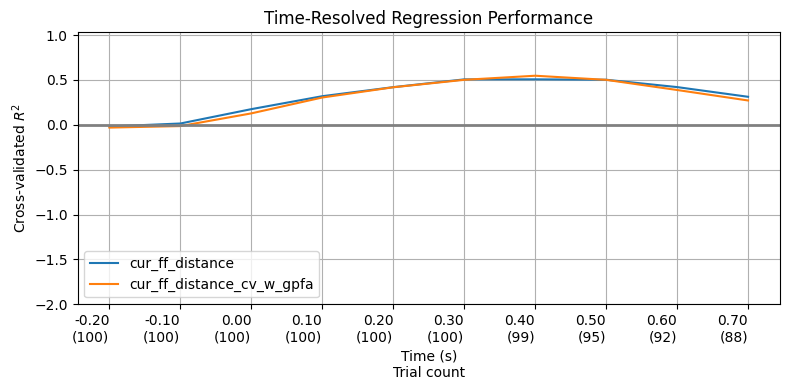

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


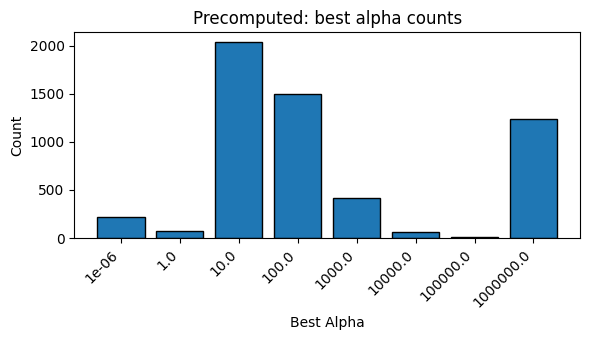

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


In [3]:
import os
import pandas as pd

# Config
raw_data_dir = 'all_monkey_data/raw_monkey_data'
monkey_name = 'monkey_Schro'
#file_name = 'scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv2.csv'
file_name = 'scores_b0p1_t2_cur_first_p0p25_po0p75_d7_cv5.csv'
features_to_plot = [
    'cur_ff_distance', 'cur_ff_rel_x', 'time_rel_to_stop', 
    'nxt_ff_distance', 'nxt_ff_rel_x', 'time_since_last_capture'
]

# Load session info
sessions_df = combine_info_utils.make_sessions_df_for_one_monkey(raw_data_dir, monkey_name)

# Helper: get full paths for the neural CSVs
def get_cv_score_paths(base_path, file_name):
    neural_base = base_path.replace('raw_monkey_data', 'planning_and_neural')
    return (
        os.path.join(neural_base, 'event_aligned/time_resolved_cv_scores_gpfa', file_name),
        os.path.join(neural_base, 'event_aligned/time_resolved_cv_scores/precomputed_gpfa', file_name)
    )

# Main loop
for feature in features_to_plot:
    print(f"\n{'='*100}\n{'='*100}")
    print(f"Feature: {feature}")

    for _, row in sessions_df.iterrows():
        if row.get('finished', False):
            continue

        data_path = os.path.join(raw_data_dir, row['monkey_name'], row['data_name'])
        print(f"{'='*100}\nProcessing session at: {data_path}")

        gpfa_path, precomputed_path = get_cv_score_paths(data_path, file_name)

        if not (os.path.exists(gpfa_path) and os.path.exists(precomputed_path)):
            print('Files don\'t exist yet.')
            continue

        # Load and tag data
        df_gpfa = pd.read_csv(gpfa_path)
        df_gpfa['gpfa_inside'] = True

        df_precomputed = pd.read_csv(precomputed_path)
        df_precomputed['gpfa_inside'] = False

        # ================================
        ## in case the dfs are in the old format
        if feature in df_precomputed.columns:
            df_precomputed['r2'] = df_precomputed[feature].values
            df_precomputed['feature'] = feature
        if feature in df_gpfa.columns:
            df_gpfa['r2'] = df_gpfa[feature].values
            df_gpfa['feature'] = feature
        # ================================

        combined = pd.concat([df_gpfa, df_precomputed], ignore_index=True)
        
        # Subset and relabel
        df_feature = combined[combined['feature'] == feature].copy()
        df_feature.loc[df_feature['gpfa_inside'], 'feature'] = f"{feature}_cv_w_gpfa"
        df_feature.drop(columns='gpfa_inside', inplace=True)

        # Plot
        pn.plot_time_resolved_regression(
            time_resolved_cv_scores=df_feature,
            score_threshold_to_plot=None,
            rank_by_max_score=False
        )
        
        plot_time_resolved_regression.plot_best_alpha_counts(df_precomputed, title='Precomputed: best alpha counts')
        plot_time_resolved_regression.plot_best_alpha_counts(df_gpfa, title='GPFA: best alpha counts')

        break  # Only one session per feature for now
    break  # Remove this if you want to process all features
